In [1]:

#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [2]:
#path to project 
path = r'C:\Users\Admin\Documents\CF Tasks\Last Python Advanced Analytics'

In [3]:
#import data as dataframe 
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','citi_4.csv'))

In [4]:
#check the df 
df.head()

,Unnamed: 0,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08


In [5]:
#drop unnamed column 
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
#check the columns 
df.columns.to_list()

['weekday',
 'start_hour',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'trip_duration',
 'subscriber',
 'birth_year',
 'gender',
 'start_of_ride',
 'end_of_ride']

In [7]:
#check for duplicates 
df_dups = df[df.duplicated()] 
df_dups
#no duplicates 

,weekday,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride


In [8]:
#check for missing values 
df.isnull().sum()
#no missign values 

weekday                    0
start_hour                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
start_of_ride              0
end_of_ride                0
dtype: int64

In [9]:
#check for mixed datatypes 
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
#no mixed data types 

In [10]:
#list column names 
df.columns.to_list()

['weekday',
 'start_hour',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'trip_duration',
 'subscriber',
 'birth_year',
 'gender',
 'start_of_ride',
 'end_of_ride']

In [11]:
#aggregate 
agg = {'start_hour':'first',
      'start_station_id':'first',
      'end_station_id':'first',
       'start_station_latitude':'first',
       'end_station_latitude':'first',
       'start_station_longitude':'first',
       'end_station_longitude':'first',
       'start_of_ride':'first',
       'end_of_ride':'first',
      'trip_duration':'first',
      'birth_year':'first'}

In [12]:
#group data according to county 
df = df.groupby(['weekday','start_station_name','end_station_name','gender']).agg(agg)

In [14]:
df

start_hour  \
weekday start_station_name end_station_name             gender               
Fri     1 Ave & E 15 St    2 Ave & E 31 St              1                1   
                           6 Ave & Canal St             2                8   
                           8 Ave & W 31 St              2               14   
                           Church St & Leonard St       2                7   
                           Cliff St & Fulton St         1               10   
...                                                                    ...   
Wed     York St & Jay St   Stanton St & Chrystie St     1               19   
                           Washington Ave & Park Ave    1               20   
                                                        2               19   
                           Willoughby Ave & Hall St     1               17   
                           Willoughby Ave & Walworth St 2               18   

                                                                start_station_id  \
weekday start_station_name end_station_name             gender                     
Fri     1 Ave & E 15 St    2 Ave & E 31 St              1                    504   
                           6 Ave & Canal St             2                    504   
                           8 Ave & W 31 St              2                    504   
                           Church St & Leonard St       2                    504   
                           Cliff St & Fulton St         1                    504   
...                                                                          ...   
Wed     York St & Jay St   Stanton St & Chrystie St     1                    430   
                           Washington Ave & Park Ave    1                    430   
                                                        2                    430   
                           Willoughby Ave & Hall St     1                    430   
                           Willoughby Ave & Walworth St 2                    430   

                                                                end_station_id  \
weekday start_station_name end_station_name             gender                   
Fri     1 Ave & E 15 St    2 Ave & E 31 St              1                  528   
                           6 Ave & Canal St             2                  377   
                           8 Ave & W 31 St              2                  521   
                           Church St & Leonard St       2                  320   
                           Cliff St & Fulton St         1                  306   
...                                                                        ...   
Wed     York St & Jay St   Stanton St & Chrystie St     1                  265   
                           Washington Ave & Park Ave    1                  313   
                                                        2                  313   
                           Willoughby Ave & Hall St     1                  244   
                           Willoughby Ave & Walworth St 2                  373   

                                                                start_station_latitude  \
weekday start_station_name end_station_name             gender                           
Fri     1 Ave & E 15 St    2 Ave & E 31 St              1                    40.732219   
                           6 Ave & Canal St             2                    40.732219   
                           8 Ave & W 31 St              2                    40.732219   
                           Church St & Leonard St       2                    40.732219   
                           Cliff St & Fulton St         1                    40.732219   
...                                                                                ...   
Wed     York St & Jay St   Stanton St & Chrystie St     1                    40.701485   
                           Washington Ave & Park Ave    1                    40

In [15]:
# Convert the result to a new DataFrame
df = pd.DataFrame(df.reset_index())

In [16]:
#remove categorical columns
df = df.drop(columns = ['weekday','start_station_name','end_station_name','gender'])

In [17]:
#check columns in new dataframe 
df.columns.to_list()

['start_hour',
 'start_station_id',
 'end_station_id',
 'start_station_latitude',
 'end_station_latitude',
 'start_station_longitude',
 'end_station_longitude',
 'start_of_ride',
 'end_of_ride',
 'trip_duration',
 'birth_year']

In [20]:
#remove categorical columns
df = df.drop(columns = ['start_of_ride','end_of_ride'])

# The new dataframe contains total cases and deaths per county from all dates (2020 - 2023)

# 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [21]:
#define a range of potential numbers of clusters in the data 
#choosing 1-10 like in the Exercise
num_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

In [22]:
#after applying range, then apply k-means algorithm 
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]
#this will output a list of scores 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\clust

In [23]:
#list score
score

[-14734371010.695734,
 -10286905280.383808,
 -6822045079.492109,
 -3575195424.071348,
 -2668440267.442483,
 -2324271441.0671062,
 -2151532808.4324617,
 -1983565611.8762536,
 -1822056189.5572946]

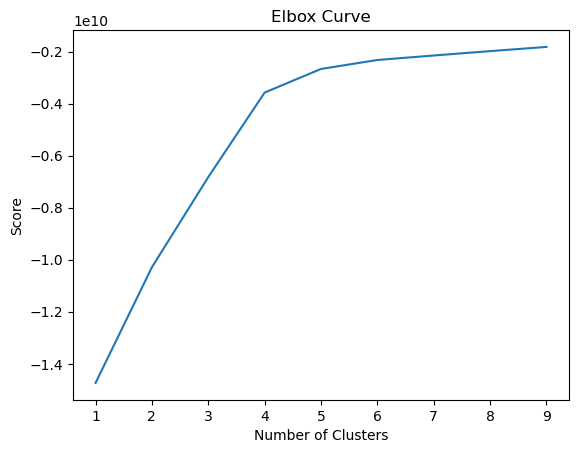

In [24]:
#plot the elbow curve 
pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbox Curve')
pl.show()

# 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
- Explain why you chose that number in a markdown cell.
- If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.

I will be choosing the number 4. The values jump rapidly from 1 through 4, then plateaus after 4. This means the optimal count for clusters is 4. 

# 5. Run the k-means algorithm 

In [25]:
#create the k-means object
kmeans = KMeans(n_clusters = 4)

In [26]:
#fit kmeans object to dataframe 
kmeans.fit(df)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

# 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [27]:
#create column in dataframe with values corresponding to clusters 
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
#check the dataframe to see the new column 
df.head()

,start_hour,start_station_id,end_station_id,start_station_latitude,end_station_latitude,start_station_longitude,end_station_longitude,trip_duration,birth_year,clusters
0,1,504,528,40.732219,40.742909,-73.981656,-73.977061,358,1984.0,1
1,8,504,377,40.732219,40.722438,-73.981656,-74.005664,1052,1994.0,0
2,14,504,521,40.732219,40.750450,-73.981656,-73.994811,116,1983.0,1
3,7,504,320,40.732219,40.717440,-73.981656,-74.005835,1341,1968.0,0
4,10,504,306,40.732219,40.708235,-73.981656,-74.005301,389,1956.0,1


In [29]:
#count the clusers 
df['clusters'].value_counts()

1    24652
0    10786
2     1187
3     1156
Name: clusters, dtype: int64

# 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

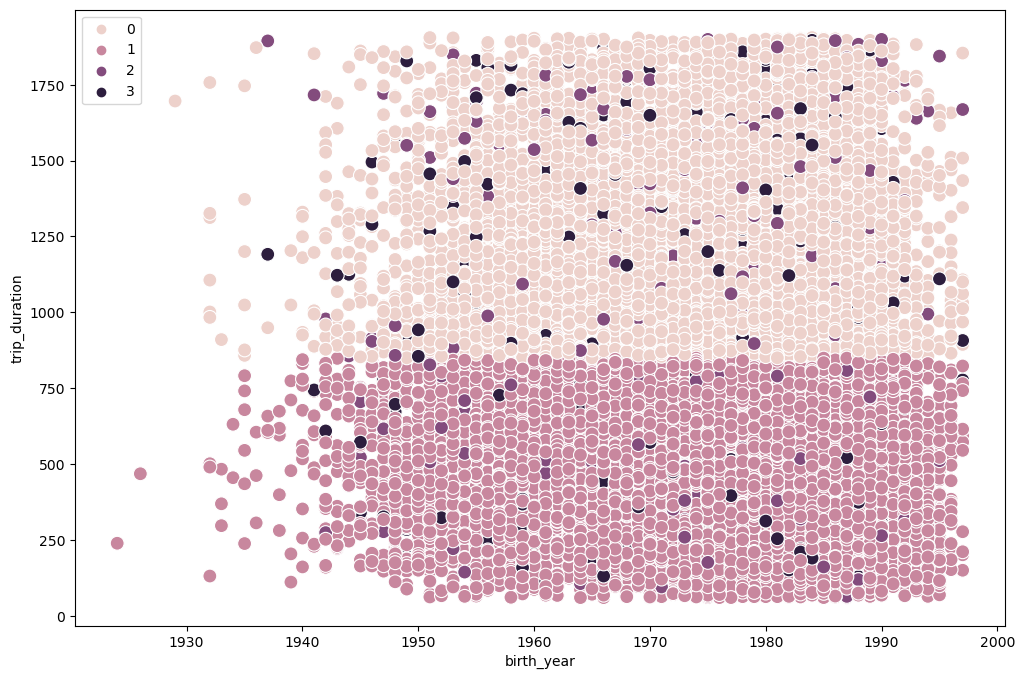

In [32]:
#trip duration vs birth year

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['birth_year'], y=df['trip_duration'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('birth_year') # Label x-axis.
plt.ylabel('trip_duration') # Label y-axis.
plt.show()

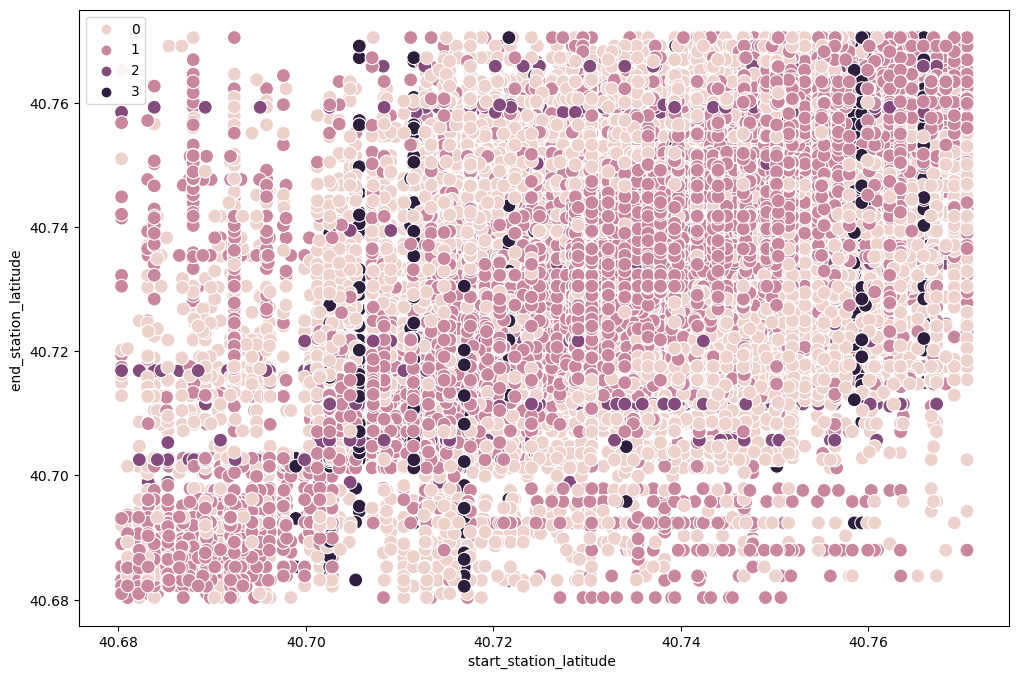

In [33]:
#trip duration vs birth year


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['start_station_latitude'], y=df['end_station_latitude'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_station_latitude ') # Label x-axis.
plt.ylabel('end_station_latitude ') # Label y-axis.
plt.show()

# 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
There are 4 distinct clusters that were selected from the elbow technique. The first group (0) are mostly counties with small populations and low cases and deaths. The second group (1) consist of counties with populations less than 2 million with total cases less than 1 million and total deaths less than 10,000. The fourth group (3) consist of counties with populations between 2 to 6 million. This group has 500,000 - 2 million cases and 5,000 - 20,000 deaths. The third group (2) only has one observation. This county has the largest population of around 10,000,000. It has around 3.5 million total cases and 35,000 recorded deaths. This data makes sense as there are a wide range of population sizes in America. Some counties are very small while others can have millions of residents. 

# 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.


In [34]:
#create a column that renames the clusters to colors 
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df.groupby('cluster').agg({
    'trip_duration':['mean','median'],
    'birth_year':['mean','median']
})

trip_duration           birth_year        
                     mean  median         mean  median
cluster                                               
black          797.124567   706.0  1975.473183  1978.0
dark purple    786.951137   683.0  1975.716091  1978.0
pink          1218.246245  1157.0  1975.376692  1978.0
purple         479.776651   472.0  1976.013021  1978.0

The purple cluster has  lowest trip duration

The pink cluster has highest trip duration.

The black cluster  and Dark cluster has more or less than same amount of trip duration.


# 10. Propose what these results could be useful for in future steps of an analytics pipeline.
We can analyse that which age group has the highest usage of citibikes and what re the busiest hours.
